# Data Preprocessing
- Data Cleaning
    1. Impute missing values
    2. Merged mmvt and skltn data
- Data Transformation
    1. Filtering: savogol filter
    2. Normalization: z-score normalization, min-max normalization
    3. Sequence length normalization: padding
- Data integration
    1. Merge data
    2. Concatenate data
- Feature Engineering
    1. Create new features
    2. Feature Selection
- Data Splitting
    1. Split data into training and validation sets
    2. Split data into features and target variable


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data Cleaning
- Impute missing values by using interative imputer
- Data intergration: merge mmvt and skltn data into one file

In [2]:
dataset_path = './data/0-raw'
cleaned_path = './data/1-cleaned'
filtered_path = './data/2-filtered'
normalized_path = './data/3-normalized'

if not os.path.exists(cleaned_path):
        os.makedirs(cleaned_path)
if not os.path.exists(filtered_path):
        os.makedirs(filtered_path)
if not os.path.exists(normalized_path):
        os.makedirs(normalized_path)



# Participants IDs
IDs = ['001', '003', '004', '005', '115', '116', '117', '118', '120', '121',
        '122', '123', '125', '126', '127', '128', '129', '130', '131', '132',
        '133', '135', '138', '151', '152', '301', '303', '304', '305', '306',
        '307', '308', '309']

In [3]:
# Observe the data

# Load the data
data = pd.read_csv(os.path.join(dataset_path, f'{IDs[1]}-mvmt-left.csv'), index_col=0)
data1 = pd.read_csv(os.path.join(dataset_path, f'{IDs[0]}-mvmt-left.csv'), index_col=0)


data.head()

,LKNE_x,LKNE_y,LANK_x,LANK_y,LD3M_x,LD3M_y,LD1M_x,LD1M_y,LHLX_x,LHLX_y
0,113.575806,136.495560,74.322754,450.214935,81.554459,526.267944,47.736313,525.683167,53.988174,542.441223
1,114.895081,139.012604,74.322754,452.790924,81.734619,526.267944,47.760040,525.683167,54.059830,542.441223
2,115.511353,141.489655,74.322754,456.489014,81.734619,526.267944,47.852158,525.683167,54.123169,542.441223
3,116.145233,143.915771,73.627045,459.018555,81.554459,525.896729,47.852158,525.428406,54.512024,542.145325
4,116.553864,146.527344,73.554428,460.382568,81.554459,525.797241,47.853119,525.073853,54.707993,540.941223


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LKNE_x  312 non-null    float64
 1   LKNE_y  312 non-null    float64
 2   LANK_x  312 non-null    float64
 3   LANK_y  312 non-null    float64
 4   LD3M_x  235 non-null    float64
 5   LD3M_y  235 non-null    float64
 6   LD1M_x  233 non-null    float64
 7   LD1M_y  233 non-null    float64
 8   LHLX_x  312 non-null    float64
 9   LHLX_y  312 non-null    float64
dtypes: float64(10)
memory usage: 26.8 KB


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 0 to 401
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LKNE_x  402 non-null    float64
 1   LKNE_y  402 non-null    float64
 2   LANK_x  402 non-null    float64
 3   LANK_y  402 non-null    float64
 4   LD3M_x  402 non-null    float64
 5   LD3M_y  402 non-null    float64
 6   LD1M_x  402 non-null    float64
 7   LD1M_y  402 non-null    float64
 8   LHLX_x  396 non-null    float64
 9   LHLX_y  396 non-null    float64
dtypes: float64(10)
memory usage: 34.5 KB


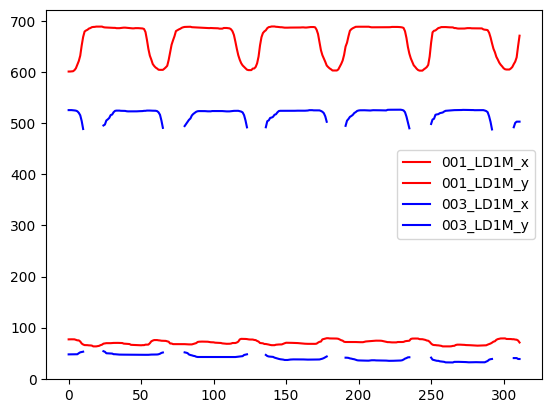

In [6]:
# Plot the data

plt.plot(data.index, data1['LD1M_x'][: len(data)], label='001_LD1M_x', color='red')
plt.plot(data.index, data1['LD1M_y'][: len(data)], label='001_LD1M_y', color='red')
plt.plot(data.index, data['LD1M_x'], label='003_LD1M_x', color='blue')
plt.plot(data.index, data['LD1M_y'], label='003_LD1M_y', color='blue')
plt.legend()
plt.show()

### Fill missing values - Iterative Imputer

As we can see from the data, there are missing values in the data. And the data is continuous, so we can use the Iterative Imputer to fill in the missing values. The Iterative Imputer uses a machine learning model to estimate the missing values. It is a good choice for filling in missing values in the data.

In [7]:
# Impute missing values
from Data_Preprocessing.data_preprocessing_functions import impute_missing_values

imputed_data = impute_missing_values(data)

imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LKNE_x  312 non-null    float64
 1   LKNE_y  312 non-null    float64
 2   LANK_x  312 non-null    float64
 3   LANK_y  312 non-null    float64
 4   LD3M_x  312 non-null    float64
 5   LD3M_y  312 non-null    float64
 6   LD1M_x  312 non-null    float64
 7   LD1M_y  312 non-null    float64
 8   LHLX_x  312 non-null    float64
 9   LHLX_y  312 non-null    float64
dtypes: float64(10)
memory usage: 26.8 KB


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LKNE_x  312 non-null    float64
 1   LKNE_y  312 non-null    float64
 2   LANK_x  312 non-null    float64
 3   LANK_y  312 non-null    float64
 4   LD3M_x  235 non-null    float64
 5   LD3M_y  235 non-null    float64
 6   LD1M_x  233 non-null    float64
 7   LD1M_y  233 non-null    float64
 8   LHLX_x  312 non-null    float64
 9   LHLX_y  312 non-null    float64
dtypes: float64(10)
memory usage: 26.8 KB


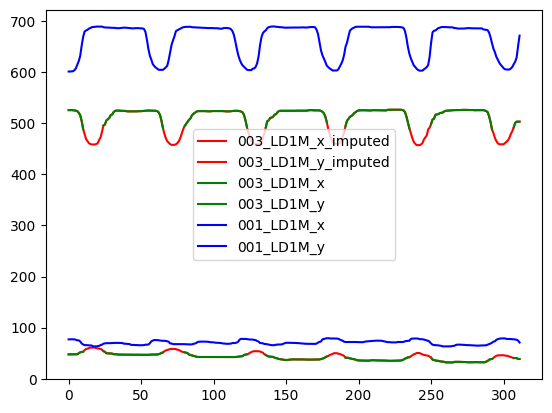

In [9]:
plt.plot(data.index, imputed_data['LD1M_x'], label='003_LD1M_x_imputed', color='red')
plt.plot(data.index, imputed_data['LD1M_y'], label='003_LD1M_y_imputed', color='red')
plt.plot(data.index, data['LD1M_x'], label='003_LD1M_x', color='green')
plt.plot(data.index, data['LD1M_y'], label='003_LD1M_y', color='green')
plt.plot(data.index, data1['LD1M_x'][: len(data)], label='001_LD1M_x', color='blue')
plt.plot(data.index, data1['LD1M_y'][: len(data)], label='001_LD1M_y', color='blue')

plt.legend()
plt.show()

In [10]:
frames = []

for ID in IDs:
    df1 = pd.read_csv(os.path.join(dataset_path, f'{ID}-mvmt-left.csv'), index_col=0)
    df2 = pd.read_csv(os.path.join(dataset_path, f'{ID}-mvmt-right.csv'), index_col=0)
    df3 = pd.read_csv(os.path.join(dataset_path, f'{ID}-skltn-left.csv'), index_col=0)
    df4 = pd.read_csv(os.path.join(dataset_path, f'{ID}-skltn-right.csv'), index_col=0)

    frames.append(len(df1))
    frames.append(len(df2))
    frames.append(len(df3))
    frames.append(len(df4))

max_frame = np.max(np.array(frames))
min_frame = np.min(np.array(frames))

print(f'Maximum frame length: {max_frame}, Minimum frame length: {min_frame}')


Maximum frame length: 1386, Minimum frame length: 135


## Data Transformation
- Normalization
- Filter: smoothing, denoising
- Sequence length normalization

### Normalization
- StandardScaler: z-score normalization
- MinMaxScaler: min-max normalization

In [11]:
left_data = pd.read_csv(os.path.join(cleaned_path, f'{IDs[0]}-left.csv'), index_col=0)
right_data = pd.read_csv(os.path.join(cleaned_path, f'{IDs[0]}-right.csv'), index_col=0)

left_data.describe()

,KNE_x,KNE_y,ANK_x,ANK_y,D3M_x,D3M_y,D1M_x,D1M_y,HLX_x,HLX_y,KNE_ANK_length,KNE_ANK_orientation,ANK_D3M_length,ANK_D3M_orientation,ANK_D1M_length,ANK_D1M_orientation,D1M_HLX_length,D1M_HLX_orientation
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,102.429307,160.578720,100.912773,551.837786,109.480797,669.046999,70.044423,665.781894,83.072516,688.887715,391.340532,90.271798,118.309945,84.255981,118.161672,105.151087,27.390320,58.260455
std,3.109287,22.769203,8.569797,8.681034,6.158846,31.879710,4.478678,31.706850,6.976385,38.744810,21.588346,1.132579,26.111715,7.365985,28.159030,2.414750,3.912025,15.759447
min,94.450226,121.424141,88.154968,535.541138,100.217438,604.814331,61.798157,601.152283,73.899841,609.481201,356.448068,87.531737,70.587539,67.369189,65.661853,100.253037,18.380927,22.390220
25%,100.557671,134.502518,94.624794,546.650818,104.483398,645.857422,66.750229,641.468979,77.871796,657.201218,372.317273,89.616057,94.852256,81.310427,94.548673,103.019077,23.013912,45.873414
50%,102.641235,174.506332,97.990784,549.484863,107.699585,688.387451,69.648239,685.506927,80.706329,713.906586,386.426077,90.604476,125.171421,85.374217,125.752552,105.219879,29.237701,65.986953
75%,104.315521,179.370689,106.182564,559.665451,113.354317,690.585587,72.758347,687.063110,88.677849,714.861877,413.197934,91.004642,141.815765,90.191603,143.637994,107.041346,30.264214,69.243488
max,111.237579,186.082413,120.980408,567.397827,123.196686,693.230103,79.355896,689.330017,97.793274,715.601501,425.457499,92.600005,146.783290,94.763719,147.694176,109.913065,32.985854,74.779108


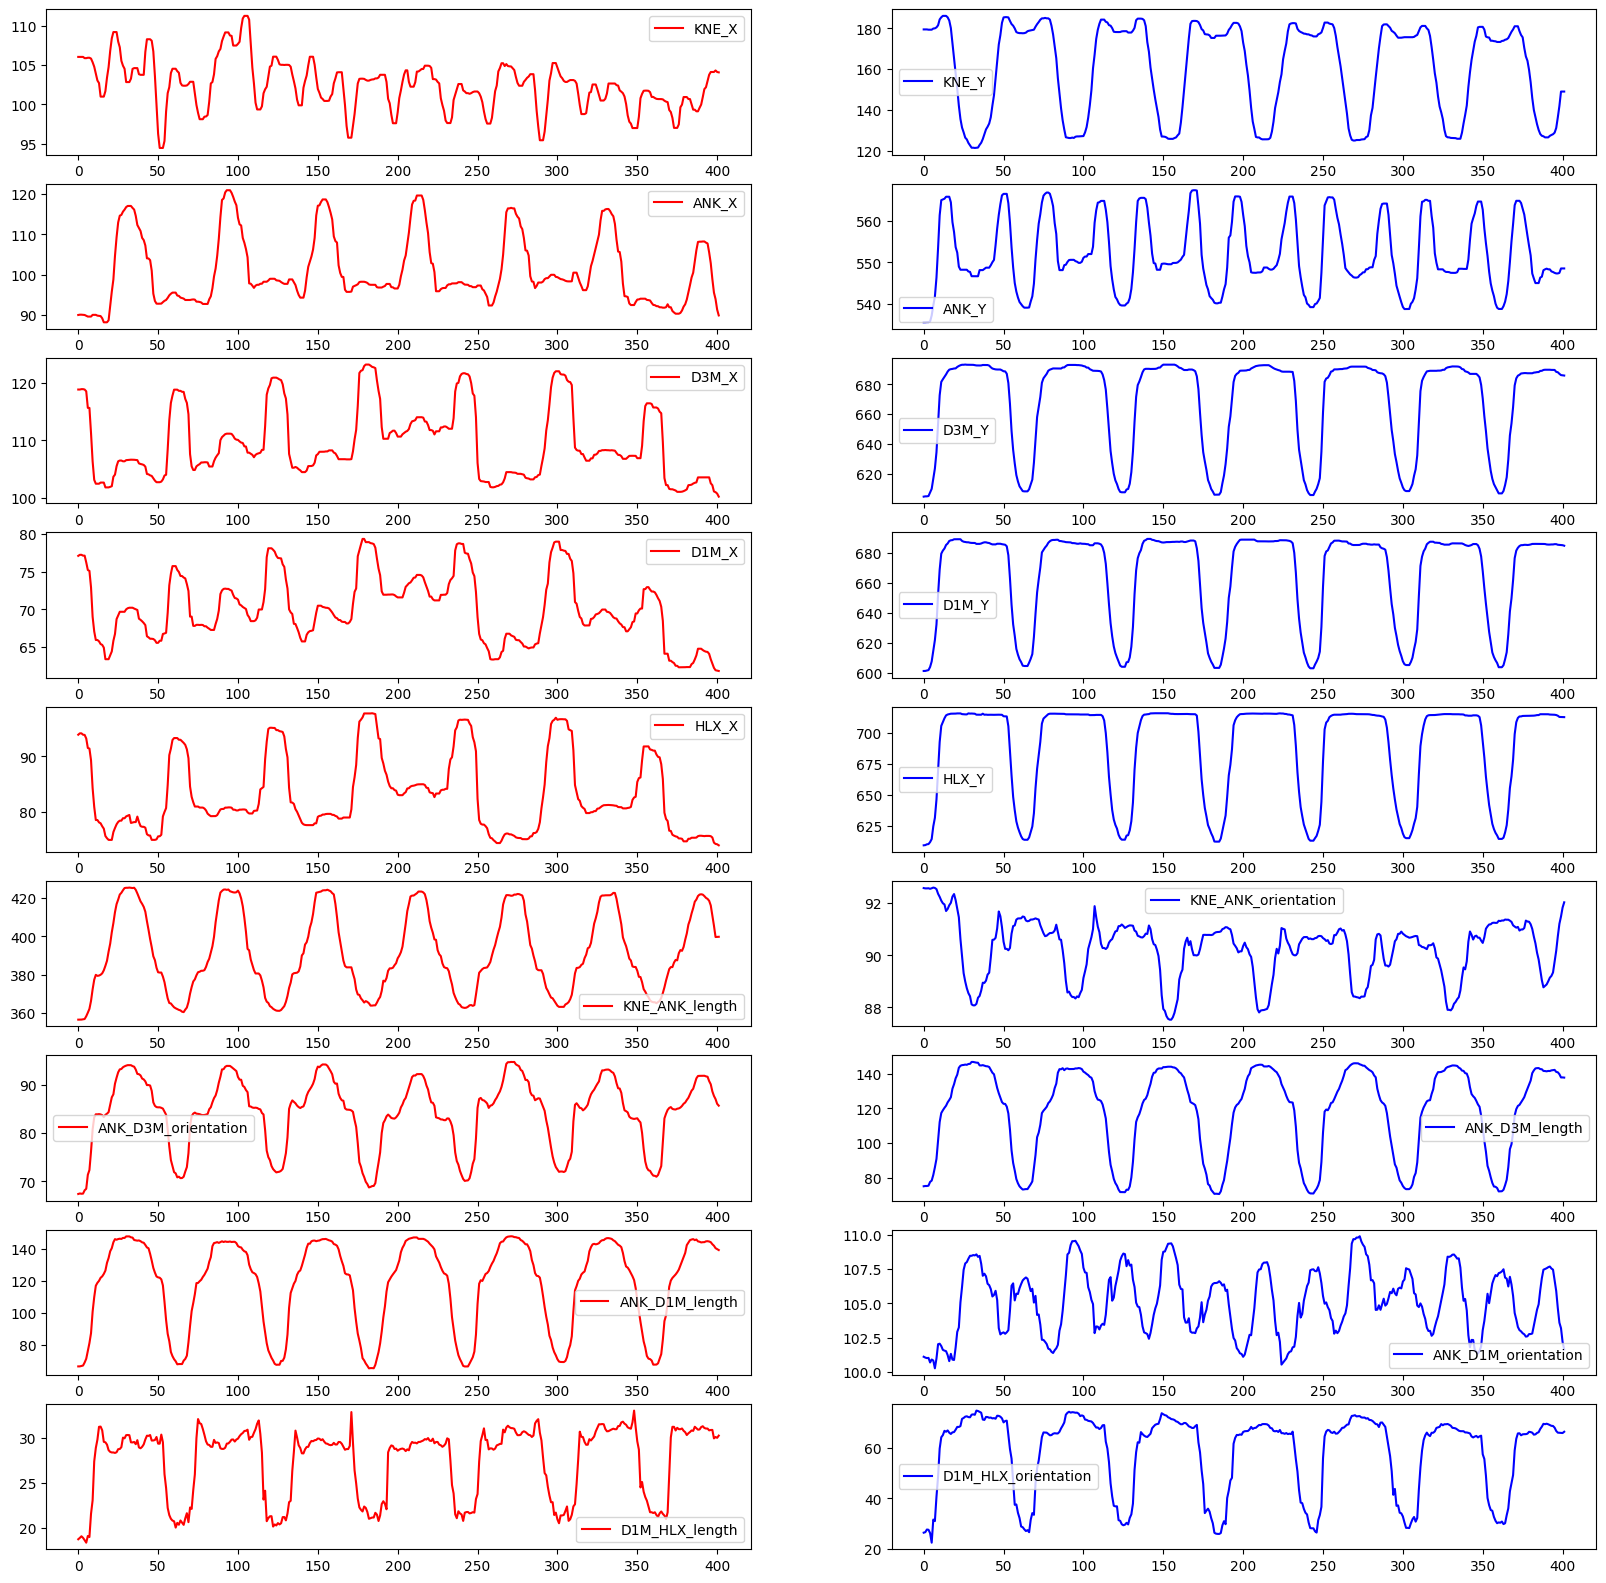

In [12]:
fig, ax = plt.subplots(9, 2, figsize=(20, 20))

ax[0, 0].plot(left_data.index, left_data['KNE_x'], label='KNE_X', color='red')
ax[0, 1].plot(left_data.index, left_data['KNE_y'], label='KNE_Y', color='blue')

ax[1, 0].plot(left_data.index, left_data['ANK_x'], label='ANK_X', color='red')
ax[1, 1].plot(left_data.index, left_data['ANK_y'], label='ANK_Y', color='blue')

ax[2, 0].plot(left_data.index, left_data['D3M_x'], label='D3M_X', color='red')
ax[2, 1].plot(left_data.index, left_data['D3M_y'], label='D3M_Y', color='blue')

ax[3, 0].plot(left_data.index, left_data['D1M_x'], label='D1M_X', color='red')
ax[3, 1].plot(left_data.index, left_data['D1M_y'], label='D1M_Y', color='blue')

ax[4, 0].plot(left_data.index, left_data['HLX_x'], label='HLX_X', color='red')
ax[4, 1].plot(left_data.index, left_data['HLX_y'], label='HLX_Y', color='blue')

ax[5, 0].plot(left_data.index, left_data['KNE_ANK_length'], label='KNE_ANK_length', color='red')
ax[5, 1].plot(left_data.index, left_data['KNE_ANK_orientation'], label='KNE_ANK_orientation', color='blue')

ax[6, 1].plot(left_data.index, left_data['ANK_D3M_length'], label='ANK_D3M_length', color='blue')
ax[6, 0].plot(left_data.index, left_data['ANK_D3M_orientation'], label='ANK_D3M_orientation', color='red')

ax[7, 0].plot(left_data.index, left_data['ANK_D1M_length'], label='ANK_D1M_length', color='red')
ax[7, 1].plot(left_data.index, left_data['ANK_D1M_orientation'], label='ANK_D1M_orientation', color='blue')

ax[8, 0].plot(left_data.index, left_data['D1M_HLX_length'], label='D1M_HLX_length', color='red')
ax[8, 1].plot(left_data.index, left_data['D1M_HLX_orientation'], label='D1M_HLX_orientation', color='blue')




# Add legends
for axes in ax.flatten():
    axes.legend()


In [13]:
def max_min_normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

normalized_left_data = max_min_normalize_data(left_data)

normalized_left_data.describe()

,KNE_x,KNE_y,ANK_x,ANK_y,D3M_x,D3M_y,D1M_x,D1M_y,HLX_x,HLX_y,KNE_ANK_length,KNE_ANK_orientation,ANK_D3M_length,ANK_D3M_orientation,ANK_D1M_length,ANK_D1M_orientation,D1M_HLX_length,D1M_HLX_orientation
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.475303,0.605562,0.388656,0.511561,0.403118,0.726484,0.469666,0.732947,0.383899,0.748269,0.505619,0.540631,0.626313,0.616429,0.639989,0.507043,0.616874,0.684692
std,0.185216,0.352147,0.261072,0.272503,0.268018,0.360566,0.255083,0.359579,0.291979,0.365103,0.312832,0.223465,0.342693,0.268885,0.343267,0.249973,0.267857,0.300817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.363812,0.202269,0.197098,0.348739,0.185644,0.464206,0.282045,0.457221,0.166236,0.449678,0.229957,0.411249,0.318452,0.508906,0.352139,0.286339,0.317221,0.448248
50%,0.487927,0.820965,0.299640,0.437702,0.325605,0.945229,0.447101,0.956643,0.284869,0.984028,0.434405,0.606270,0.716364,0.657249,0.732525,0.514164,0.743364,0.832175
75%,0.587662,0.896197,0.549196,0.757276,0.571684,0.970090,0.624237,0.974292,0.618497,0.993030,0.822349,0.685225,0.934806,0.833101,0.950554,0.702721,0.813649,0.894336
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


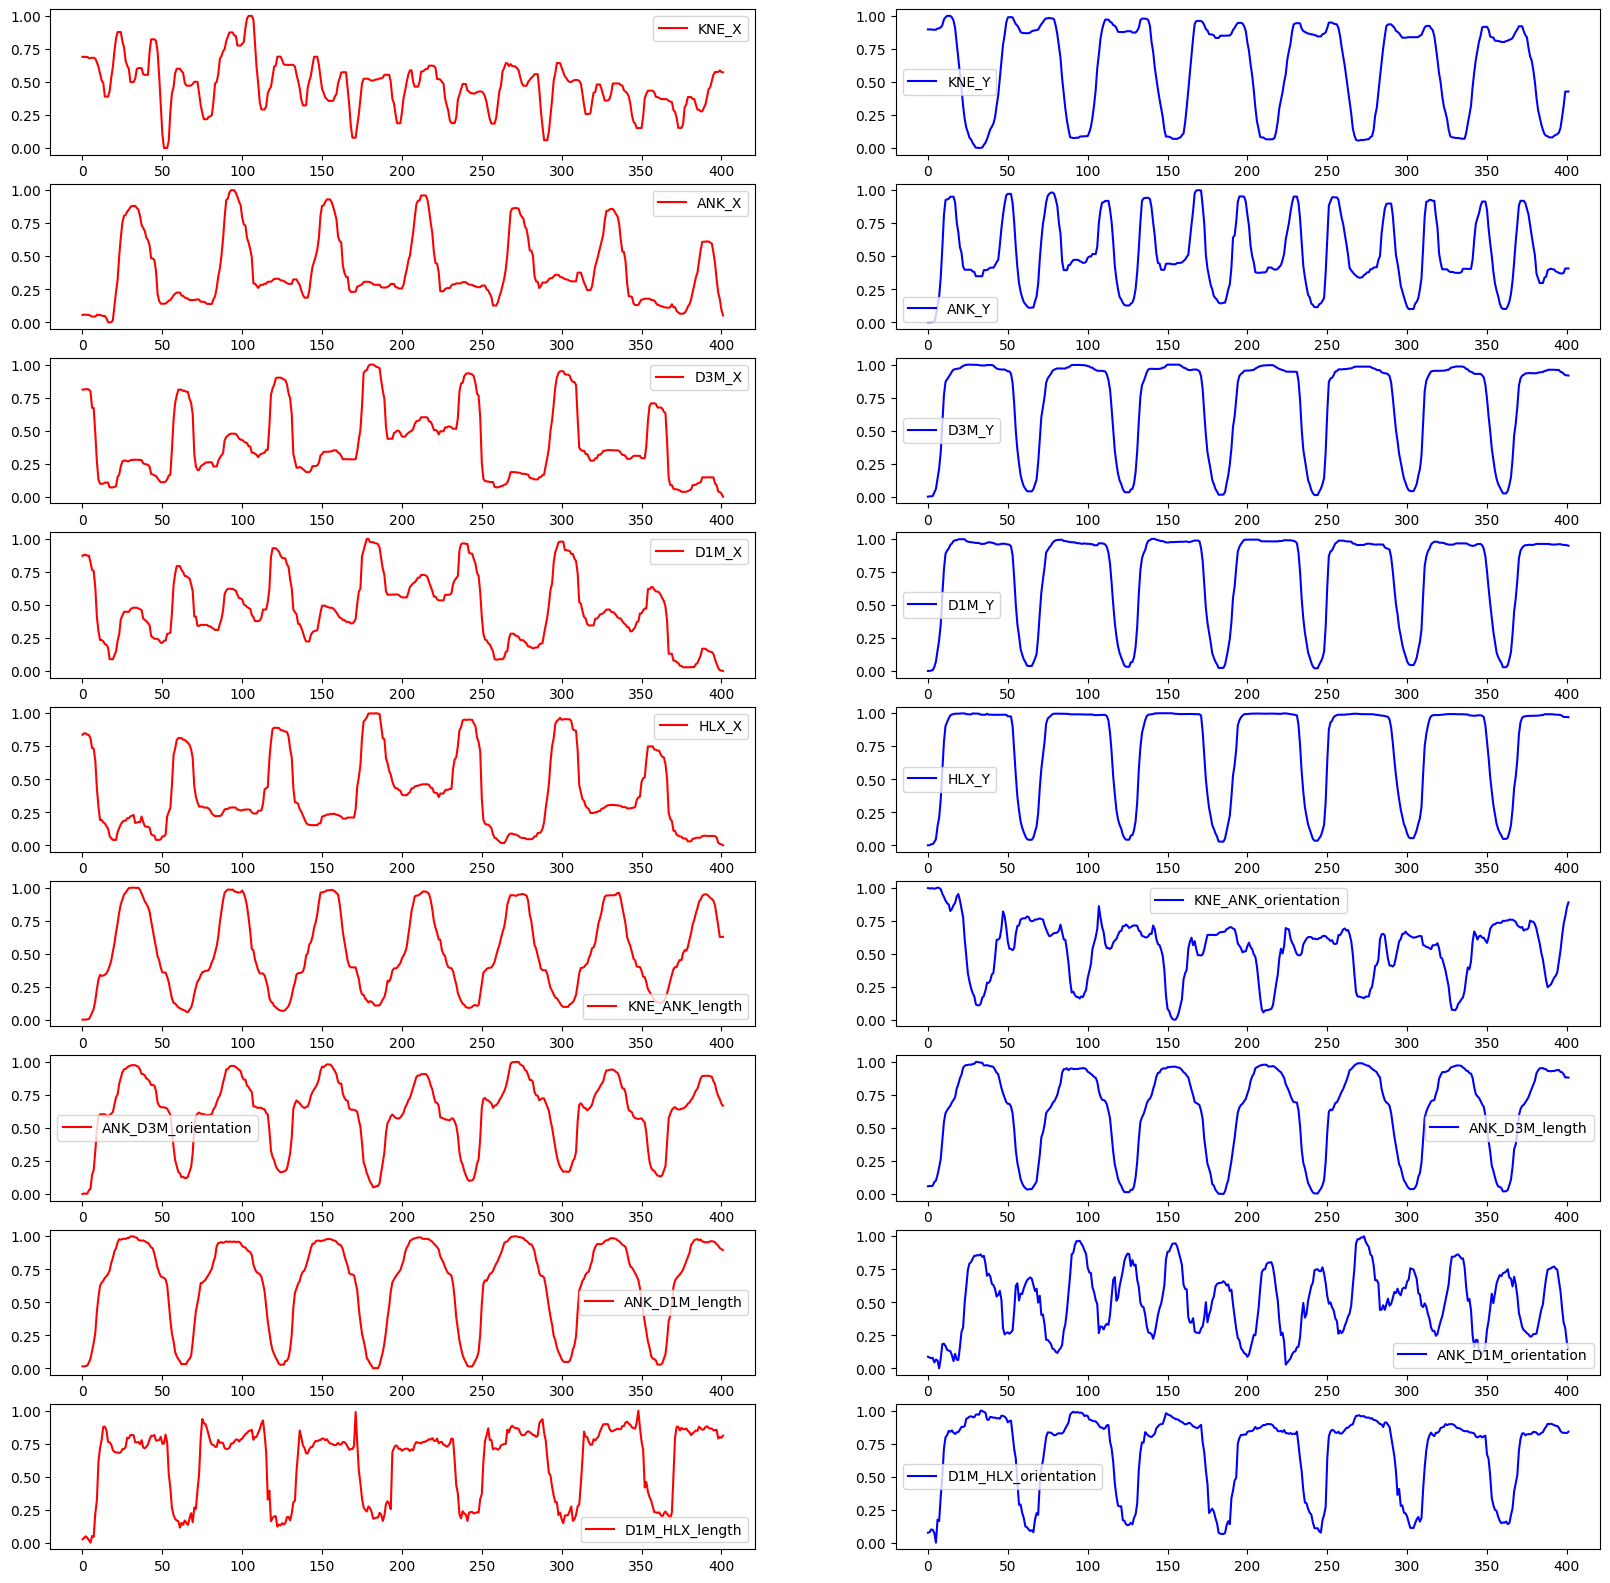

In [14]:
fig, ax = plt.subplots(9, 2, figsize=(20, 20))

ax[0, 0].plot(normalized_left_data.index, normalized_left_data['KNE_x'], label='KNE_X', color='red')
ax[0, 1].plot(normalized_left_data.index, normalized_left_data['KNE_y'], label='KNE_Y', color='blue')

ax[1, 0].plot(normalized_left_data.index, normalized_left_data['ANK_x'], label='ANK_X', color='red')
ax[1, 1].plot(normalized_left_data.index, normalized_left_data['ANK_y'], label='ANK_Y', color='blue')

ax[2, 0].plot(normalized_left_data.index, normalized_left_data['D3M_x'], label='D3M_X', color='red')
ax[2, 1].plot(normalized_left_data.index, normalized_left_data['D3M_y'], label='D3M_Y', color='blue')

ax[3, 0].plot(normalized_left_data.index, normalized_left_data['D1M_x'], label='D1M_X', color='red')
ax[3, 1].plot(normalized_left_data.index, normalized_left_data['D1M_y'], label='D1M_Y', color='blue')

ax[4, 0].plot(normalized_left_data.index, normalized_left_data['HLX_x'], label='HLX_X', color='red')
ax[4, 1].plot(normalized_left_data.index, normalized_left_data['HLX_y'], label='HLX_Y', color='blue')

ax[5, 0].plot(normalized_left_data.index, normalized_left_data['KNE_ANK_length'], label='KNE_ANK_length', color='red')
ax[5, 1].plot(normalized_left_data.index, normalized_left_data['KNE_ANK_orientation'], label='KNE_ANK_orientation', color='blue')

ax[6, 1].plot(normalized_left_data.index, normalized_left_data['ANK_D3M_length'], label='ANK_D3M_length', color='blue')
ax[6, 0].plot(normalized_left_data.index, normalized_left_data['ANK_D3M_orientation'], label='ANK_D3M_orientation', color='red')

ax[7, 0].plot(normalized_left_data.index, normalized_left_data['ANK_D1M_length'], label='ANK_D1M_length', color='red')
ax[7, 1].plot(normalized_left_data.index, normalized_left_data['ANK_D1M_orientation'], label='ANK_D1M_orientation', color='blue')

ax[8, 0].plot(normalized_left_data.index, normalized_left_data['D1M_HLX_length'], label='D1M_HLX_length', color='red')
ax[8, 1].plot(normalized_left_data.index, normalized_left_data['D1M_HLX_orientation'], label='D1M_HLX_orientation', color='blue')

# Add legends
for axes in ax.flatten():
    axes.legend()

In [15]:
def z_score_normalize_data(data):
    return (data - data.mean()) / data.std()

z_score_normalized_left_data = z_score_normalize_data(left_data)

z_score_normalized_left_data.describe()

,KNE_x,KNE_y,ANK_x,ANK_y,D3M_x,D3M_y,D1M_x,D1M_y,HLX_x,HLX_y,KNE_ANK_length,KNE_ANK_orientation,ANK_D3M_length,ANK_D3M_orientation,ANK_D1M_length,ANK_D1M_orientation,D1M_HLX_length,D1M_HLX_orientation
count,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02
mean,5.656062e-16,4.860678e-16,-1.064930e-15,6.318881e-15,-3.932730e-16,-2.474527e-16,-2.562903e-16,-5.567686e-16,-1.811707e-16,1.873570e-15,-8.395716e-16,-1.042836e-15,-1.590767e-16,1.546579e-15,-2.474527e-16,4.014478e-15,-1.679143e-16,-5.037430e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.566209e+00,-1.719629e+00,-1.488694e+00,-1.877270e+00,-1.504074e+00,-2.014845e+00,-1.841228e+00,-2.038349e+00,-1.314818e+00,-2.049475e+00,-1.616264e+00,-2.419311e+00,-1.827624e+00,-2.292537e+00,-1.864404e+00,-2.028388e+00,-2.302999e+00,-2.276110e+00
25%,-6.019505e-01,-1.145240e+00,-7.337371e-01,-5.975058e-01,-8.114179e-01,-7.274087e-01,-7.355284e-01,-7.668032e-01,-7.454750e-01,-8.178256e-01,-8.811818e-01,-5.789807e-01,-8.983588e-01,-3.998860e-01,-8.385587e-01,-8.829114e-01,-1.118706e+00,-7.860073e-01
50%,6.815964e-02,6.116864e-01,-3.409636e-01,-2.710417e-01,-2.892119e-01,6.066696e-01,-8.846007e-02,6.221064e-01,-3.391709e-01,6.457348e-01,-2.276439e-01,2.937349e-01,2.627738e-01,1.518109e-01,2.695718e-01,2.848811e-02,4.722313e-01,4.902772e-01
75%,6.066387e-01,8.253240e-01,6.149260e-01,9.016974e-01,6.289360e-01,6.756206e-01,6.059653e-01,6.711867e-01,8.034724e-01,6.703907e-01,1.012463e+00,6.470573e-01,9.002020e-01,8.058151e-01,9.047301e-01,7.827967e-01,7.346307e-01,6.969174e-01
max,2.832891e+00,1.120096e+00,2.341670e+00,1.792418e+00,2.227023e+00,7.585735e-01,2.079067e+00,7.426825e-01,2.110084e+00,6.894804e-01,1.580342e+00,2.055668e+00,1.090443e+00,1.426522e+00,1.048776e+00,1.972038e+00,1.430342e+00,1.048175e+00


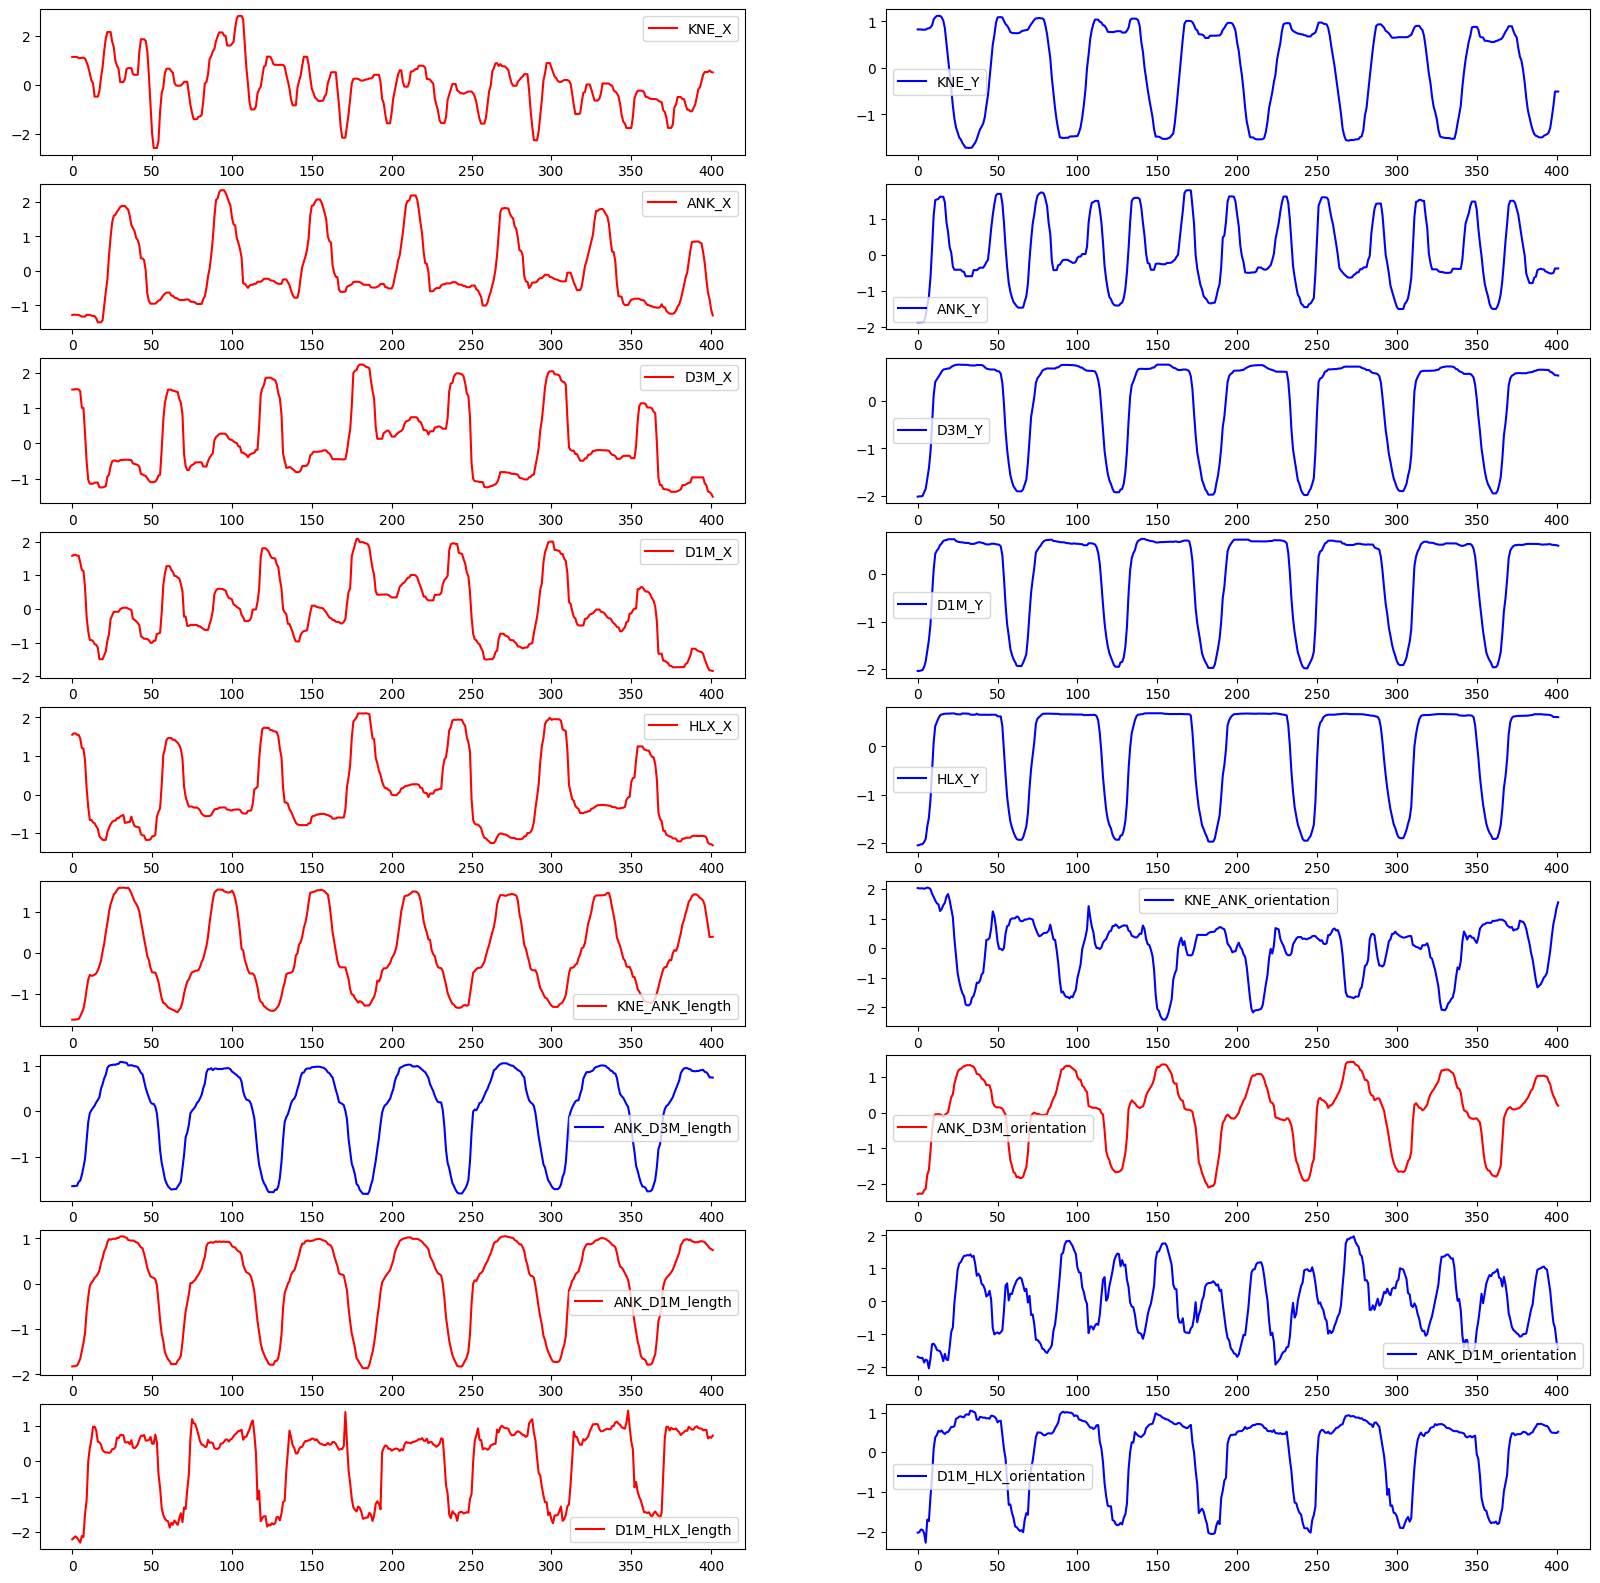

In [16]:
fig, ax = plt.subplots(9, 2, figsize=(20, 20))

ax[0, 0].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['KNE_x'], label='KNE_X', color='red')
ax[0, 1].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['KNE_y'], label='KNE_Y', color='blue')

ax[1, 0].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['ANK_x'], label='ANK_X', color='red')
ax[1, 1].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['ANK_y'], label='ANK_Y', color='blue')

ax[2, 0].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['D3M_x'], label='D3M_X', color='red')
ax[2, 1].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['D3M_y'], label='D3M_Y', color='blue')

ax[3, 0].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['D1M_x'], label='D1M_X', color='red')
ax[3, 1].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['D1M_y'], label='D1M_Y', color='blue')

ax[4, 0].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['HLX_x'], label='HLX_X', color='red')
ax[4, 1].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['HLX_y'], label='HLX_Y', color='blue')

ax[5, 0].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['KNE_ANK_length'], label='KNE_ANK_length', color='red')
ax[5, 1].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['KNE_ANK_orientation'], label='KNE_ANK_orientation', color='blue')

ax[6, 0].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['ANK_D3M_length'], label='ANK_D3M_length', color='blue')
ax[6, 1].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['ANK_D3M_orientation'], label='ANK_D3M_orientation', color='red')

ax[7, 0].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['ANK_D1M_length'], label='ANK_D1M_length', color='red')
ax[7, 1].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['ANK_D1M_orientation'], label='ANK_D1M_orientation', color='blue')

ax[8, 0].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['D1M_HLX_length'], label='D1M_HLX_length', color='red')
ax[8, 1].plot(z_score_normalized_left_data.index, z_score_normalized_left_data['D1M_HLX_orientation'], label='D1M_HLX_orientation', color='blue')

# Add legends
for axes in ax.flatten():
    axes.legend()

### Filter - Smoothing
- Savitzky-Golay filter

In [17]:
from scipy.signal import savgol_filter

def savgol_smoothing(data, window_length=10, polyorder=2):
    for col in data.columns:
        data[col] = savgol_filter(data[col], window_length, polyorder)
    return data

smoothed_left_data = savgol_smoothing(left_data)

### Standardize sequence length (padding)

In [18]:
def padding(data, max_frame):
    return data.reindex(range(max_frame), method='ffill')

padded_left_data = padding(left_data, 500)

smoothed_padding_left_data = savgol_smoothing(padded_left_data)

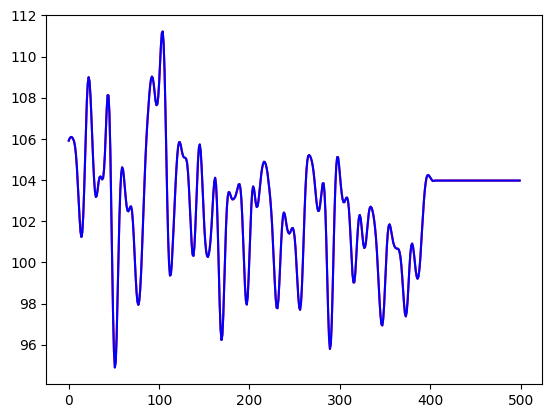

In [19]:
# Plot the data
plt.plot(padded_left_data.index, padded_left_data['KNE_x'], label='KNE_X', color='red')
plt.plot(smoothed_padding_left_data.index, smoothed_padding_left_data['KNE_x'], label='KNE_X_smoothed', color='blue')


In [20]:
# Save the imputed data

# Map the old column names to the new ones

new_cols = ['KNE_x', 'KNE_y', 
            'ANK_x', 'ANK_y', 
            'D3M_x', 'D3M_y', 
            'D1M_x', 'D1M_y', 
            'HLX_x', 'HLX_y', 
            'KNE_ANK_length', 'KNE_ANK_orientation', 
            'ANK_D3M_length', 'ANK_D3M_orientation',
            'ANK_D1M_length', 'ANK_D1M_orientation', 
            'D1M_HLX_length', 'D1M_HLX_orientation',
            ]


for ID in IDs:

    # Load the data
    mvmt_left = pd.read_csv(os.path.join(dataset_path, f'{ID}-mvmt-left.csv'), index_col=0)
    mvmt_right = pd.read_csv(os.path.join(dataset_path, f'{ID}-mvmt-right.csv'), index_col=0)
    skltn_left = pd.read_csv(os.path.join(dataset_path, f'{ID}-skltn-left.csv'), index_col=0)
    skltn_right = pd.read_csv(os.path.join(dataset_path, f'{ID}-skltn-right.csv'), index_col=0)

    # Impute missing values
    imputed_mvmt_left = impute_missing_values(mvmt_left)
    imputed_mvmt_right = impute_missing_values(mvmt_right)
    imputed_skltn_left = impute_missing_values(skltn_left)
    imputed_skltn_right = impute_missing_values(skltn_right)
    
    # Merge the mmvt and skltn data
    imputed_left = pd.concat([imputed_mvmt_left, imputed_skltn_left], axis=1)
    imputed_right = pd.concat([imputed_mvmt_right, imputed_skltn_right], axis=1)

    # Rename the columns
    imputed_left.columns = new_cols
    imputed_right.columns = new_cols

    # Save the data
    imputed_left.to_csv(os.path.join(cleaned_path, f'{ID}-left.csv'))
    imputed_right.to_csv(os.path.join(cleaned_path, f'{ID}-right.csv'))

    # filter the data
    smoothed_left = savgol_smoothing(imputed_left)
    smoothed_right = savgol_smoothing(imputed_right)

    # Save the smoothed data
    smoothed_left.to_csv(os.path.join(filtered_path, f'{ID}-left-smoothed.csv'))
    smoothed_right.to_csv(os.path.join(filtered_path, f'{ID}-right-smoothed.csv'))

    # Normalize the data
    normalized_left = max_min_normalize_data(imputed_left)
    normalized_right = max_min_normalize_data(imputed_right)

    # Save the normalized data
    normalized_left.to_csv(os.path.join(normalized_path, f'{ID}-left-normalized.csv'))
    normalized_right.to_csv(os.path.join(normalized_path, f'{ID}-right-normalized.csv'))

    


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion 